In [1]:
import gzip
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:

from matplotlib.colors import LogNorm
fontsize = 18
def hist1d(x1,x2,xlabel:str = '',density = True, bins = 'auto'):
    plt.figure(figsize=(8, 6))
    #bins = np.linspace(0, max(np.max(x1),np.max(x2)), 50) if predefined_bins else 'auto'
    n1, bins, patches = plt.hist(x1, bins=bins, density=density, histtype='step', label='Independent Geant4', color='orange', linewidth=2.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    errors1 = np.sqrt(n1)
    if not density: plt.errorbar(bin_centers, n1, yerr=errors1, color='orange',fmt='none')
    n2, _, _ = plt.hist(x2, bins=bins, density=density, histtype='step', label='FairShip', color='blue')
    errors2 = np.sqrt(n2)
    if not density: plt.errorbar(bin_centers, n2, yerr=errors2, color='blue',fmt='none')
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if needed)


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def hist2d(x, x_fs, fontsize=12):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)
    fig.tight_layout()

    # First histogram (Enriched Sample)
    h1, xedges, yedges, im1 = axes[0].hist2d(*x, bins=50, cmap='viridis', norm=LogNorm(), density=False)
    axes[0].set_xlabel('$|P|$ [GeV]', fontsize=fontsize)
    axes[0].set_ylabel('$P_t$ [GeV]', fontsize=fontsize)
    axes[0].set_title('Enriched Sample', fontsize=fontsize)
    cbar1 = fig.colorbar(im1, ax=axes[0], label='Density')

    # Second histogram (Full Sample)
    h2, _, _, im2 = axes[1].hist2d(*x_fs, bins=[xedges, yedges], cmap='viridis', norm=LogNorm(), density=False)
    axes[1].set_xlabel('$|P|$ [GeV]', fontsize=fontsize)
    axes[1].set_title('Full Sample', fontsize=fontsize)
    cbar2 = fig.colorbar(im2, ax=axes[1], label='Density')

    # Adjust tick parameters
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.tick_params(axis='both', which='minor', labelsize=fontsize)

    plt.show()

def difference_hist1d(x1,x2,xlabel:str = '',density = True, bins = 'auto'):
    n1, bins, patches = plt.hist(x1, bins=bins, density=density, histtype='step', label='Independent Geant4', color='orange', linewidth=2.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    n2, _, _ = plt.hist(x2, bins=bins, density=density, histtype='step', label='FairShip', color='blue')
    diff = n1-n2
    plt.close()
    bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers for plotting

    plt.figure(figsize=(8, 6))
    plt.bar(bin_centers, diff, width=np.diff(bins), color='blue', edgecolor='black', alpha=0.7)

    plt.xlabel(xlabel,fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if needed)


In [3]:
with gzip.open('enriched_input.pkl', 'rb') as f:
    data = pickle.load(f)

#with gzip.open('inputs.pkl', 'rb') as f:
#    data_old = pickle.load(f)

with gzip.open('full_sample/full_sample_0.pkl', 'rb') as f:
    data_full = pickle.load(f)

In [4]:
px,py,pz,x,y,z,pdg,W = data.T
pt = np.sqrt(px**2+py**2)
p = np.sqrt(px**2+py**2+pz**2)

#px_old,py_old,pz_old,x_old,y_old,z_old,pdg_old= data_old.T
#pt_old = np.sqrt(px_old**2+py_old**2)
#p_old = np.sqrt(px_old**2+py_old**2+pz_old**2)

px_full,py_full,pz_full,x_full,y_full,z_full,pdg_full, W_full= data_full.T
pt_full = np.sqrt(px_full**2+py_full**2)
p_full = np.sqrt(px_full**2+py_full**2+pz_full**2)

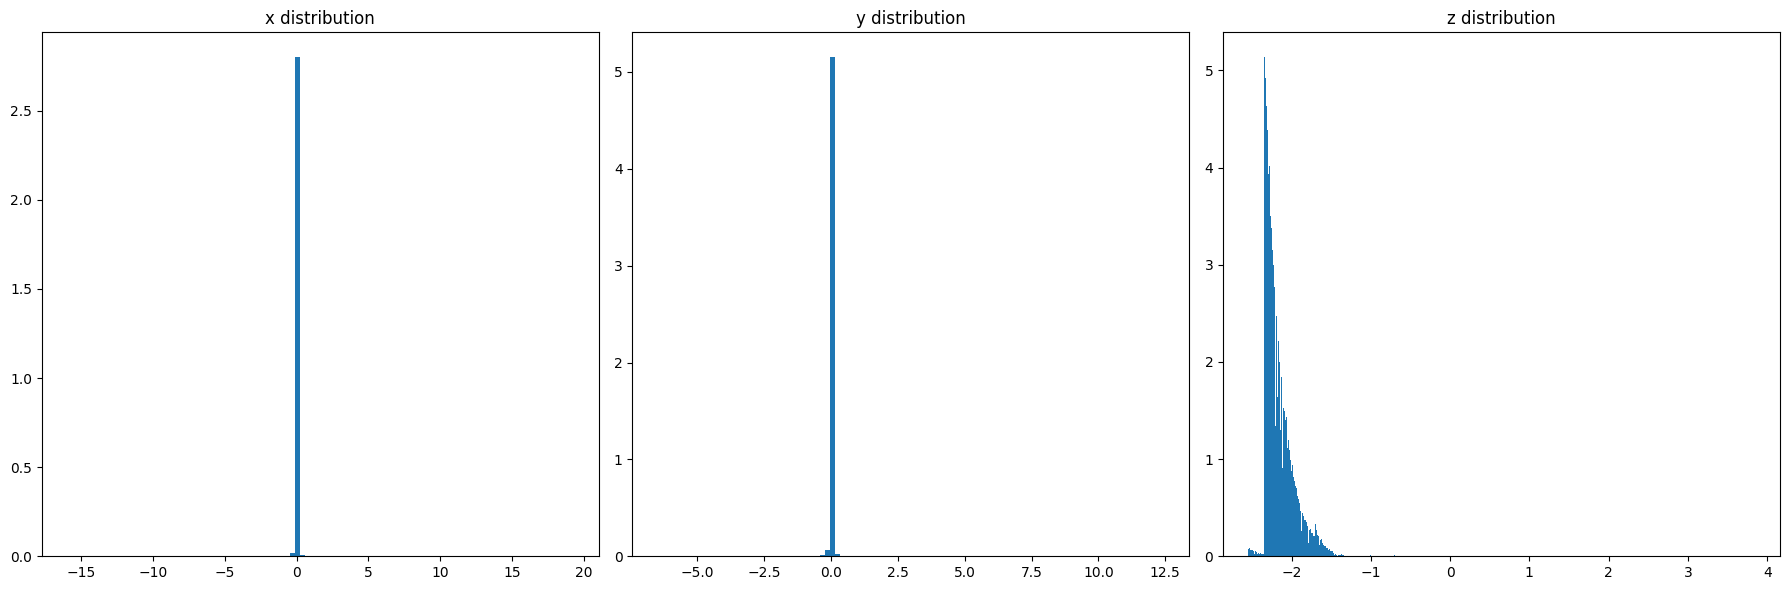

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].hist(x*100, bins=100, density = True)
axes[0].set_title('x distribution')

axes[1].hist(y*100, bins=100, density = True)
axes[1].set_title('y distribution')

axes[2].hist(z, bins='auto', density = True)
axes[2].set_title('z distribution')
plt.tight_layout()
plt.show()

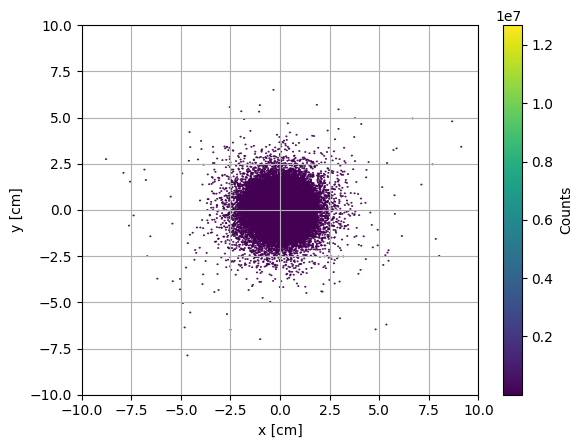

In [6]:
#plt.scatter(x*100,y*100, alpha = 0.1)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.hexbin(x_full*100, y_full*100, gridsize=1000, cmap='viridis', mincnt=1)
plt.colorbar(label='Counts')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.grid()
plt.show()

In [7]:
SmearBeam = 5
if SmearBeam > 0:
    gauss = np.random.normal(0, 1, size=x.shape)  # mean 0, stddev 1, same size as x
    uniform = np.random.uniform(0, 2, size=x.shape)

    r = SmearBeam + 0.8 * gauss
    _phi = uniform * np.pi
    dx = r * np.cos(_phi)
    dy = r * np.sin(_phi)

x += dx / 100
y += dy / 100


if SmearBeam > 0:
    gauss = np.random.normal(0, 1, size=x_full.shape)  # mean 0, stddev 1, same size as x
    uniform = np.random.uniform(0, 2, size=x_full.shape)

    r = SmearBeam + 0.8 * gauss
    _phi = uniform * np.pi
    dx = r * np.cos(_phi)
    dy = r * np.sin(_phi)
x_full += dx / 100
y_full += dy / 100


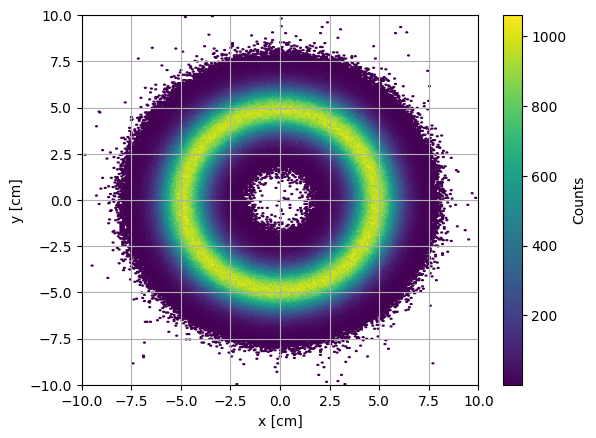

In [8]:
#plt.scatter(x*100,y*100, alpha = 0.1)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.hexbin(x_full*100, y_full*100, gridsize=500, cmap='viridis', mincnt=1)
plt.colorbar(label='Counts')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.grid()
plt.show()

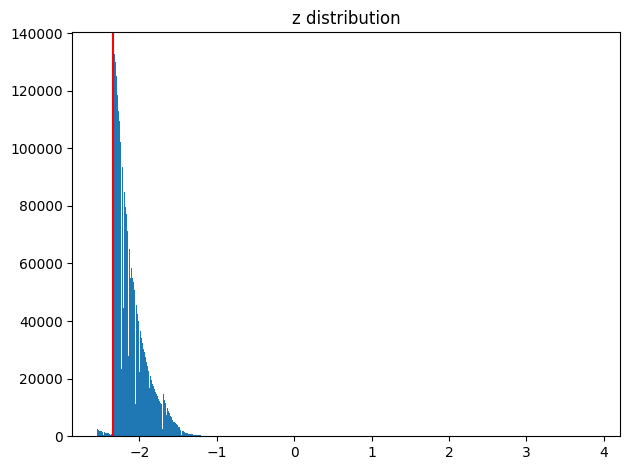

In [9]:
plt.hist(z_full, bins='auto', density = False)
plt.title('z distribution')
plt.axvline(-2.345, color = 'red')
plt.tight_layout()
plt.show()

In [10]:
z_full.min()+2.345

-0.20000000000000284

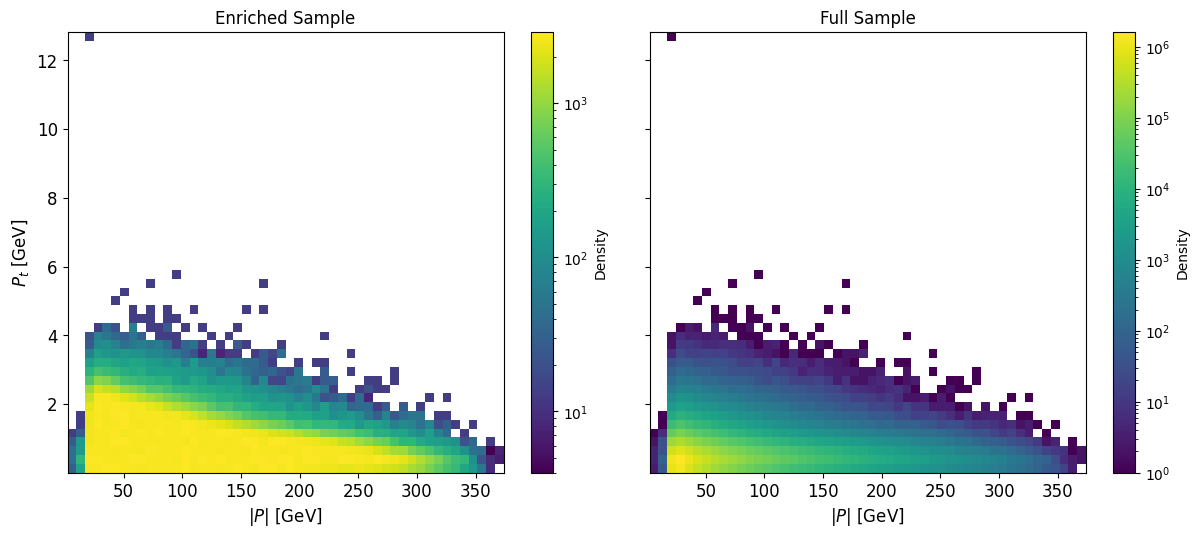

In [11]:
hist2d((p,pt),(p_full,pt_full))

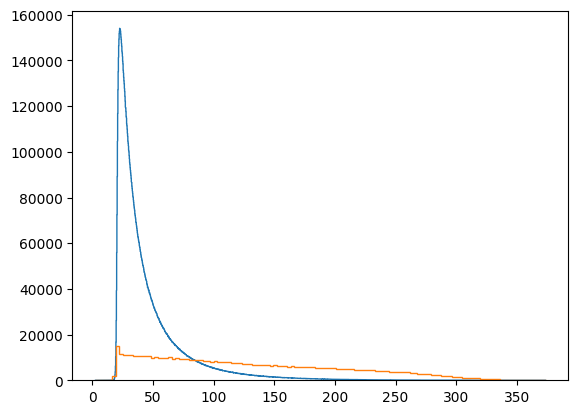

In [12]:
plt.hist(p_full, bins = 'auto', histtype='step')
plt.hist(p, bins = 'auto', histtype='step')
plt.show()

[[9.00000e-02 2.70000e+01]
 [1.00000e+00 5.08000e+02]
 [3.26000e+00 1.42800e+03]
 [7.69000e+00 5.97074e+05]
 [9.37000e+00 4.21500e+03]
 [3.26160e+02 2.45840e+04]
 [7.68750e+02 1.52820e+04]]
   Unique Values    Counts
0           0.09      27.0
1           1.00     508.0
2           3.26    1428.0
3           7.69  597074.0
4           9.37    4215.0
5         326.16   24584.0
6         768.75   15282.0


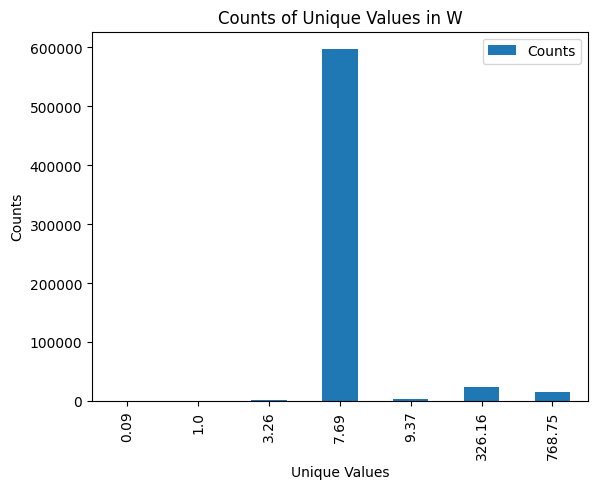

In [13]:
import pandas as pd

np.unique(W,return_counts=True)
unique, counts = np.unique(W, return_counts=True)
table = np.asarray((unique.round(2), counts)).T
print(table)
# Create a pandas DataFrame from the table
df = pd.DataFrame(table, columns=['Unique Values', 'Counts'])

# Print the DataFrame
print(df)

# Plot the DataFrame
df.plot(x='Unique Values', y='Counts', kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.title('Counts of Unique Values in W')
plt.show()

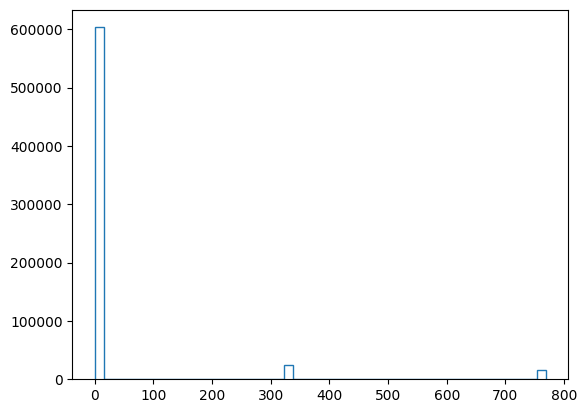

In [14]:
#plt.hist(W_full, bins = 'auto', histtype='step', label= "Full Sample")
plt.hist(W, bins = 50, histtype='step', label = "Enriched Sample")
plt.show()


(array([603252.,      0.,      0.,      0.,  24584.,      0.,      0.,
             0.,      0.,  15282.]),
 array([9.36999992e-02, 7.69593300e+01, 1.53824960e+02, 2.30690590e+02,
        3.07556220e+02, 3.84421850e+02, 4.61287480e+02, 5.38153110e+02,
        6.15018740e+02, 6.91884370e+02, 7.68750000e+02]),
 <BarContainer object of 10 artists>)

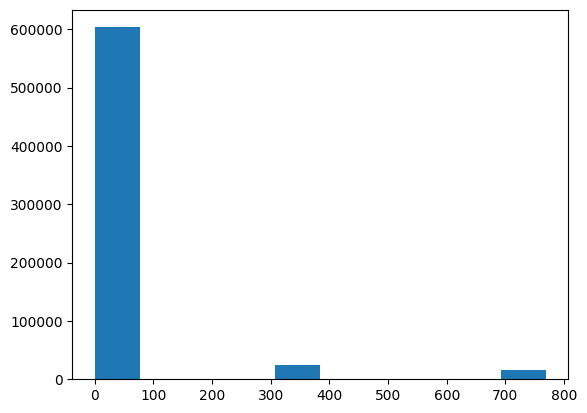

In [15]:
plt.hist(W)

In [16]:
import pandas as pd
import numpy as np

# Parameters
parameters = np.array([2.31000000e+02, 1.66443436e+02, 2.56261292e+02, 2.91919128e+02,
                        1.99210968e+02, 2.14869919e+02, 1.13462059e+02, 5.00000000e+01,
                        5.00000000e+01, 1.19000000e+02, 1.19000000e+02, 2.00000000e+00,
                        2.00000000e+00, 1.00000000e+00, 0.00000000e+00, 7.17344208e+01,
                        7.23064270e+01, 3.01792870e+01, 5.50608139e+01, 4.50294533e+01,
                        6.05307674e+00, 1.55043912e+00, 2.95457952e-02, 7.22414017e+01,
                        3.28486481e+01, 6.40336609e+01, 9.86102371e+01, 3.72791176e+01,
                        3.75814209e+01, 1.39339948e+00, 0.00000000e+00, 5.00000000e+00,
                        3.68521347e+01, 2.36333714e+01, 6.25332870e+01, 4.90338936e+01,
                        4.02122650e+01, 1.60776615e+00, 1.52162361e+00, 5.47383785e+00,
                        4.36184082e+01, 4.75524864e+01, 1.64372299e+02, 3.82776070e+01,
                        2.00000000e+00, 1.26237798e+00, 4.06472445e-01, 2.14549942e+01,
                        4.87760811e+01, 5.87977676e+01, 1.13127258e+02, 6.34082699e+00,
                        4.75470161e+01, 1.53402686e+00, 0.00000000e+00, 7.60394669e+01,
                        2.79700508e+01, 9.10693283e+01, 2.94182072e+01, 2.28603382e+01,
                        1.99502850e+01, 9.39842820e-01, 0.00000000e+00]).round(1)

# Mapping of parameters to indices
new_parametrization = {'HA': [0, 7, 8, 9, 10, 11, 12, 13, 14],
                       'M1': [1, 15, 16, 17, 18, 19, 20, 21, 22],
                       'M2': [2, 23, 24, 25, 26, 27, 28, 29, 30],
                       'M3': [3, 31, 32, 33, 34, 35, 36, 37, 38],
                       'M4': [4, 39, 40, 41, 42, 43, 44, 45, 46],
                       'M5': [5, 47, 48, 49, 50, 51, 52, 53, 54],
                       'M6': [6, 55, 56, 57, 58, 59, 60, 61, 62]}

# Column names
columns = ['Length', 'Core Width 1', 'Core Width 2', 'Core Height 1', 'Core Height 2', 
           'Gap 1', 'Gap 2', 'Yoke/Core Ratio', 'Middle Gap']

# Creating DataFrame
data = {magnet: parameters[idx] for magnet, idx in new_parametrization.items()}
df = pd.DataFrame.from_dict(data, orient='index', columns=columns)
df

,Length,Core Width 1,Core Width 2,Core Height 1,Core Height 2,Gap 1,Gap 2,Yoke/Core Ratio,Middle Gap
HA,231.0,50.0,50.0,119.0,119.0,2.0,2.0,1.0,0.0
M1,166.4,71.7,72.3,30.2,55.1,45.0,6.1,1.6,0.0
M2,256.3,72.2,32.8,64.0,98.6,37.3,37.6,1.4,0.0
M3,291.9,5.0,36.9,23.6,62.5,49.0,40.2,1.6,1.5
M4,199.2,5.5,43.6,47.6,164.4,38.3,2.0,1.3,0.4
M5,214.9,21.5,48.8,58.8,113.1,6.3,47.5,1.5,0.0
M6,113.5,76.0,28.0,91.1,29.4,22.9,20.0,0.9,0.0
